Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
nodes=1: 0.146
nodes=2: 0.402
nodes=3: 0.486
nodes=4: 0.692
nodes=5: 0.886
nodes=6: 0.798
nodes=7: 1.000


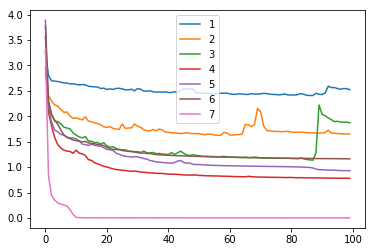

In [3]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare multi-class classification dataset
def create_dataset():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
    random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit model with given number of nodes, returns test set accuracy

def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    # configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu',
    kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model on train set
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc


# prepare dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    # summarize final test set accuracy
    print('nodes=%d: %.3f' % (n_nodes, result))
    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_nodes))
    # show the plot
    pyplot.legend()
pyplot.show()



In [5]:
#fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    # configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu',
    kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc

layers=1: 1.000
layers=2: 1.000
layers=3: 0.942
layers=4: 0.992
layers=5: 0.826
layers=6: 0.086
layers=7: 0.520
layers=10: 0.080


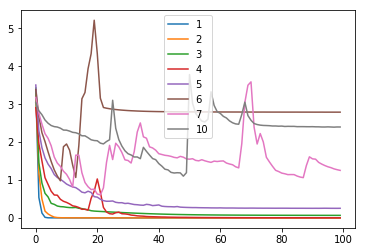

In [7]:
# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5 , 6, 7, 10]
for n_layers in num_layers:
    # evaluate model with a given number of layers
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print('layers=%d: %.3f' % (n_layers, result))
    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_layers))
    pyplot.legend()
pyplot.show()

Train: 0.820, Test: 0.832


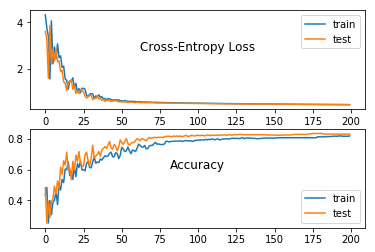

In [8]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0,batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.390, Test: 0.398


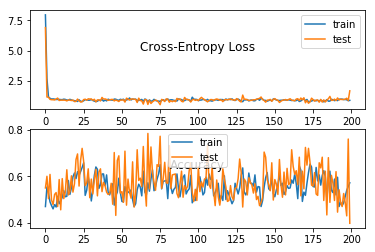

In [9]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0,batch_size=1)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

#### Update learning rate

######  Example output from stochastic gradient descent with smaller learning rate for an MLP on the blobs problem.

Train: 0.840, Test: 0.824


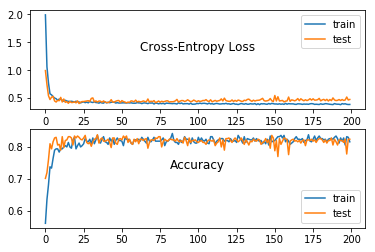

In [10]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0,batch_size=1)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [23]:
def mean_square_error(actual, predicted):
    sum_square_error = 0.0
    for i in range(len(actual)):
        sum_square_error += (actual[i] - predicted[i])**2
    mean_square_error = sum_square_error*1.0/len(actual)
    return mean_square_error

In [24]:
mean_square_error([1,2,3] , [1.2,2.1,3.1])

0.020000000000000004

In [ ]:
from math import log
# calculate binary cross-entropy
def binary_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        sum_score += actual[i] * log(1e-15 + predicted[i])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

In [25]:
from math import log
# calculate categorical cross-entropy
def categorical_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        for j in range(len(actual[i])):
            sum_score += actual[i][j] * log(1e-15 + predicted[i][j])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

In [31]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [47]:
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [48]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Train: 0.003, Test: 0.010


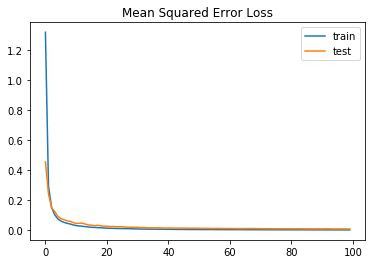

In [50]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
# 4.2. Regression Loss Functions Case Study 59
pyplot.title('Mean Squared Error Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Mean Squared Logarithmic Error Loss

Train: 4.167, Test: 4.367


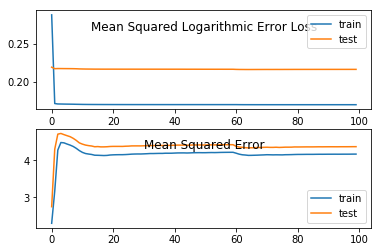

In [51]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Mean Squared Logarithmic Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error', pad=-20)
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

In [53]:
# Mean Absolute Error Loss

Train: 0.003, Test: 0.007


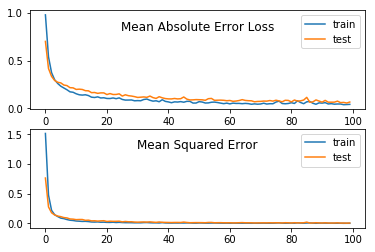

In [54]:
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Mean Absolute Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error', pad=-20)
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

In [55]:
# 4.3 Binary Classication Loss Functions Case Study

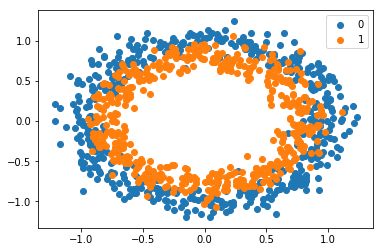

In [58]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
    pyplot.legend()
pyplot.show()

Train: 0.836, Test: 0.846


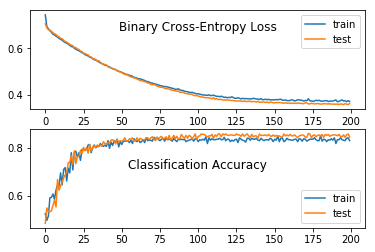

In [59]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# mlp for the circles problem with cross-entropy loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Binary Cross-Entropy Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.806, Test: 0.770


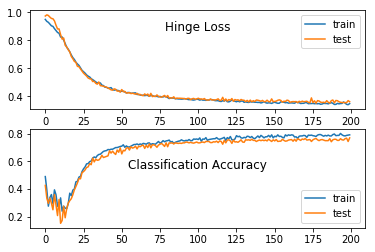

In [60]:
#Hinge Loss
# mlp for the circles problem with hinge loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [61]:
# 4.3.3 Squared Hinge Loss

Train: 0.684, Test: 0.660


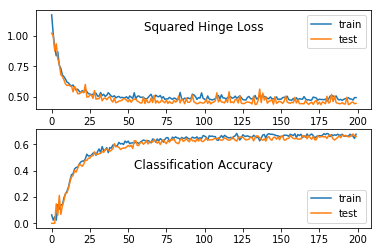

In [62]:
# mlp for the circles problem with squared hinge loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Squared Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [63]:
# 4.4 Multiclass Classication Loss Functions Case Study

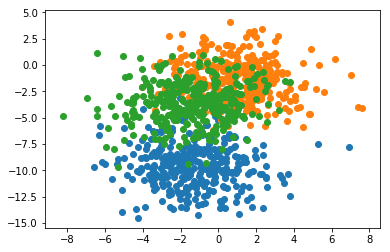

In [64]:
# scatter plot of blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from numpy import where
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
for i in range(3):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

Train: 0.830, Test: 0.824
Train: 0.814, Test: 0.828


/root/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Categorical Cross-Entropy Loss')

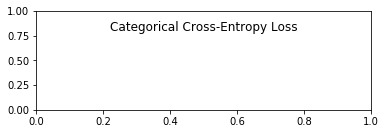

In [65]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Categorical Cross-Entropy Loss', pad=-20)
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Categorical Cross-Entropy Loss', pad=-20)

In [66]:
# 4.4.2 Sparse Multiclass Cross-Entropy Loss

Train: 0.826, Test: 0.822


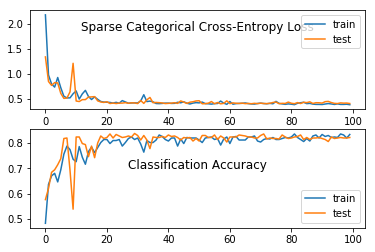

In [67]:
# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Sparse Categorical Cross-Entropy Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [68]:
# Kullback Leibler Divergence Loss

Train: 0.810, Test: 0.822


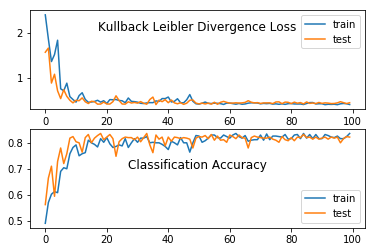

In [69]:
# mlp for the blobs multi-class classification problem with kl divergence loss
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Kullback Leibler Divergence Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [70]:
### Learning Rates

In [72]:
from keras.optimizers import SGD
opt = SGD()

SGD(lr=0.01, momentum=0.8)
# model.compile(..., optimizer=opt)

In [73]:
# lrate = initial lrate *  1 /(deacy * iteration)
SGD(lr=0.01, momentum=0.9 , decay=.01)
# Learning Rate Schedule
# snippet of using the ReduceLROnPlateau callback
from keras.callbacks import ReduceLROnPlateau

rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)
# model.fit(..., callbacks=[rlrop])
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

from keras.callbacks import LearningRateScheduler
...
def my_learning_rate(epoch, lrate)
return lrate
lrs = LearningRateScheduler(my_learning_rate)
model.fit(..., callbacks=[lrs])


SyntaxError: invalid syntax (<ipython-input-73-508df5664cec>, line 1)

In [74]:
# Adaptive Learning Rate Gradient Descent

In [ ]:
# RMSProp Optimizer

opt = RMSprop()
model.compile(..., optimizer=opt)

# Adagrad Optimizer
opt = Adagrad()
model.compile(..., optimizer=opt)


# Adam Optimizer
opt = Adam()
model.compile(..., optimizer=opt)

In [80]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)

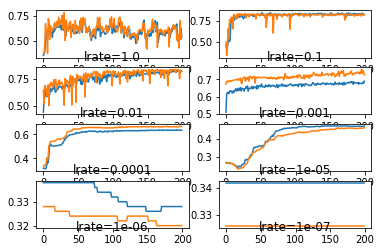

In [82]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
pyplot.show()

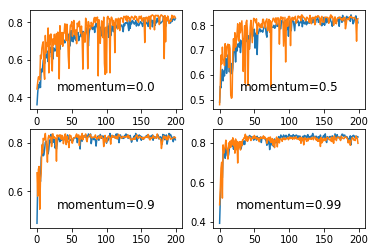

In [83]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
        # define model
        model = Sequential()
        model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(3, activation='softmax'))
        # compile model
        opt = SGD(lr=0.01, momentum=momentum)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        # fit model
        history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
        # 5.3. Learning Rate Case Study 102
        # plot learning curves
        pyplot.plot(history.history['acc'], label='train')
        pyplot.plot(history.history['val_acc'], label='test')
        pyplot.title('momentum='+str(momentum), pad=-80)


# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a momentum
    fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.show()



In [84]:
## Learning rate Decay

In [85]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

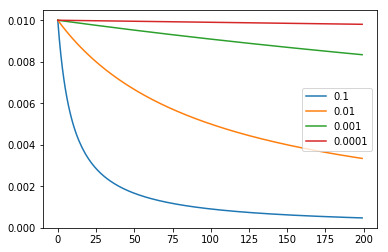

In [87]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    # plot result
    pyplot.plot(lrates, label=str(decay))
    pyplot.legend()

In [88]:
decay_lrate(0.01, 0.1, 3200)

3.115264797507788e-05

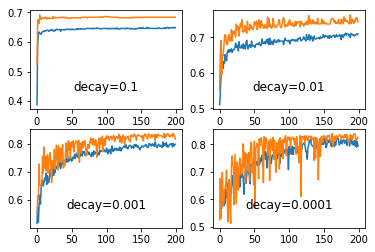

In [89]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.title('decay='+str(decay), pad=-80)
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a decay rate
    fit_model(trainX, trainy, testX, testy, decay_rates[i])
# show learning curves
pyplot.show()

In [94]:
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras import backend

from matplotlib import pyplot
# monitor the learning rate
class LearningRateMonitor(Callback):
    # start of training
    def on_train_begin(self, logs={}):
        self.lrates = list()
        # end of each training epoch
    def on_epoch_end(self, epoch, logs={}):
        # get and store the learning rate
        optimizer = self.model.optimizer
        lrate = float(backend.get_value(optimizer.lr))
        self.lrates.append(lrate)

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, patience):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # 5.3. Learning Rate Case Study 110
    # compile model
    opt = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience,
    min_delta=1E-7)
    lrm = LearningRateMonitor()
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200,
    verbose=0, callbacks=[rlrp, lrm])
    return lrm.lrates, history.history['loss'], history.history['acc']

# create learning curves for different patiences
patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()
for i in range(len(patiences)):
    # fit model and plot learning curves for a patience
    lr, loss, acc = fit_model(trainX, trainy, testX, testy, patiences[i])
    lr_list.append(lr)
    loss_list.append(loss)
    acc_list.append(acc)

# create line plots for a series
def line_plots(patiences, series):
    for i in range(len(patiences)):
        pyplot.subplot(220 + (i+1))
        pyplot.plot(series[i])
        pyplot.title('patience='+str(patiences[i]), pad=-80)
    pyplot.show()

In [95]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different patiences
patiences = [2, 5, 10, 15]

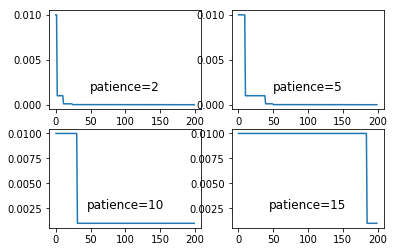

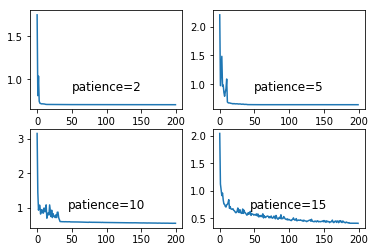

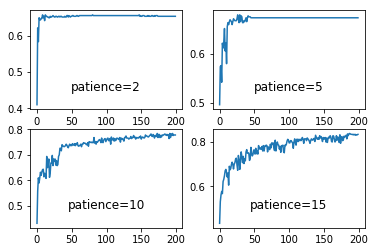

In [96]:
lr_list, loss_list, acc_list, = list(), list(), list()
for i in range(len(patiences)):
    # fit model and plot learning curves for a patience
    lr, loss, acc = fit_model(trainX, trainy, testX, testy, patiences[i])
    lr_list.append(lr)
    loss_list.append(loss)
    acc_list.append(acc)
# plot learning rates
line_plots(patiences, lr_list)
# plot loss
line_plots(patiences, loss_list)
# plot accuracy
line_plots(patiences, acc_list)

In [98]:
# Keras provides a number of dierent popular variations of stochastic gradient descent with adaptive learning rates,
# Eect of Adaptive Learning Rates
# Adaptive Gradient Algorithm (AdaGrad).
# Root Mean Square Propagation (RMSprop).
# Adaptive Moment Estimation (Adam).

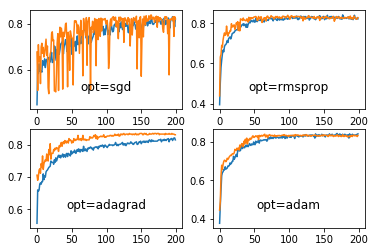

In [104]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.title('opt='+optimizer, pad=-80)

trainX, trainy, testX, testy = prepare_data()
# create learning curves for different optimizers
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(trainX, trainy, testX, testy, optimizers[i])
    # show learning curves
pyplot.show()

In [105]:
# Stabilize Learning with Data Scaling

In [108]:
X.shape

(1000, 20)

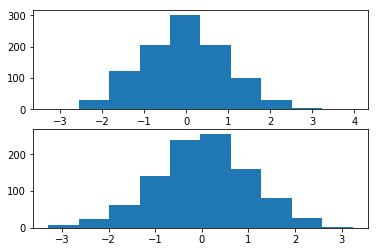

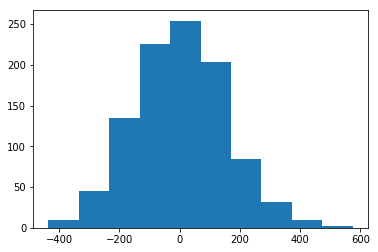

In [109]:
# regression predictive modeling problem
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# histograms of input variables
pyplot.subplot(211)
pyplot.hist(X[:, 0])
pyplot.subplot(212)
pyplot.hist(X[:,5])
pyplot.show()
# histogram of target variable
pyplot.hist(y)
pyplot.show()

In [110]:
# Multilayer Perceptron With Unscaled Data
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [111]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [112]:
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

In [113]:
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

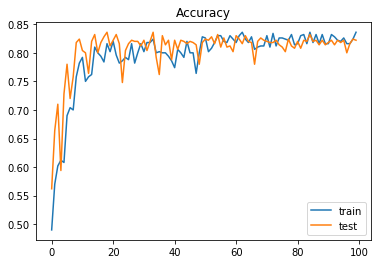

In [118]:
# plot loss during training
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

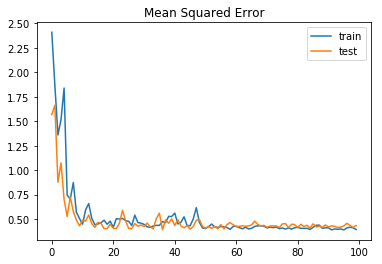

In [114]:
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [116]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [120]:
trainX.shape

(500, 20)

In [128]:
testy = testy.reshape(len(trainy) , 1)
trainy = trainy.reshape(len(trainy) , 1)

In [129]:
# created scaler
scaler = StandardScaler()
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

Train: 0.003, Test: 0.012


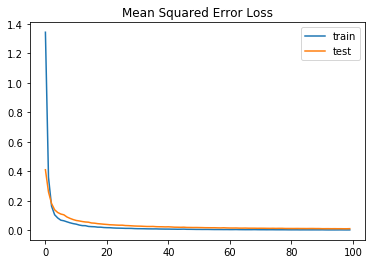

In [131]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [132]:
# Multilayer Perceptron With Scaled Input Variables

In [133]:
#  No scaling of inputs, standardized outputs.
#  Normalized inputs, standardized outputs.
#  Standardized inputs, standardized outputs.

>0.005
>0.006
>0.006
>0.009
>0.004
>0.005
>0.005
>0.008
>0.006
>0.004
>0.010
>0.003
>0.006
>0.009
>0.001
>0.012
>0.011
>0.010
>0.012
>0.008
>0.007
>0.003
>0.009
>0.007
>0.004
>0.008
>0.011
>0.010
>0.014
>0.002
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.001
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.014
>0.006
>0.009
>0.002
>0.006
>0.009
>0.009
>0.005
>0.010
>0.004
>0.001
>0.004
>0.010
>0.008
>0.006
>0.001
>0.002
>0.011
>0.005
>0.010
>0.009
>0.010
>0.002
>0.002
>0.006
>0.000
>0.006
>0.010
>0.007
>0.003
Unscaled: 0.007 (0.003)
Normalized: 0.000 (0.000)
Standardized: 0.006 (0.004)


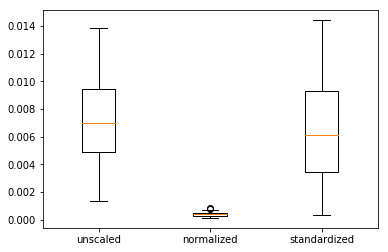

In [136]:
# compare scaling methods for mlp inputs on regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std


# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
    # generate dataset
    X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    # scale inputs
    if input_scaler is not None:
        # fit scaler
        input_scaler.fit(trainX)
        # transform training dataset
        trainX = input_scaler.transform(trainX)
        # transform test dataset
        testX = input_scaler.transform(testX)
    if output_scaler is not None:
        # reshape 1d arrays to 2d arrays
        trainy = trainy.reshape(len(trainy), 1)
        testy = testy.reshape(len(trainy), 1)
        # fit scaler on training dataset
        output_scaler.fit(trainy)
    # transform training dataset
    trainy = output_scaler.transform(trainy)
    # transform test dataset
    testy = output_scaler.transform(testy)
    return trainX, trainy, testX, testy

# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate the model
    test_mse = model.evaluate(testX, testy, verbose=0)
    return test_mse

# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
    # get dataset
    trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
    # repeated evaluation of model
    results = list()
    for _ in range(n_repeats):
        test_mse = evaluate_model(trainX, trainy, testX, testy)
        print('>%.3f' % test_mse)
        results.append(test_mse)
    return results

# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())


# summarize results
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs),
std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs),
std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs),
std(results_standardized_inputs)))

# plot results
results = [results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()

### Fix Vanishing Gradients with ReLU

1)The sigmoid and hyperbolic tangent activation functions cannot be used in networks with
many layers due to the vanishing gradient problem.


2)The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.


3)The rectified linear activation is the default activation when developing Multilayer Percep-tron and convolutional neural networks.

In [ ]:
the tanh function was preferred over the sigmoid activation function as models that used it were easier to train and often had better predictive performance.
the hyperbolic tangent activation function typically performs better than the
logistic sigmoid.


Vanishing gradients make it dicult to know which direction the parameters should
move to improve the cost function

In [137]:
# 7.1.1 Limitations of Sigmoid and Tanh Activation Functions

In [ ]:
For example, after uniform initialization of the weights, around 50% of hidden units
continuous output values are real zeros

when using sigmoid and tanh activation functions, generally referred to as Xavier initialization.(specifically +/- 1/sqrt(n) where n is the number of nodes in the prior layer).

For ReLU, now commonly referred to as He initialization, uniform distribution of +/-2/sqrt(n); n is Fan-in

Scale Input Data :  good practice to standardize 0,1) mean -0 and std as 1 using guassian distrubution.. mean centering and unit varaiance
    Without data scaling on many problems, the weights of the neural network can
grow large, making the network unstable and increasing the generalization error.
This good practice of scaling inputs applies whether using ReLU for your network or not.

Use Weight Penalty:
    
    Use Weight Penalty
By design, the output from ReLU is unbounded in the positive domain. This means that in
some cases, the output can continue to grow in size. As such, it may be a good idea to use a
form of weight regularization, such as an L1 or L2 vector norm.
This can be a good practice to both promote sparse representations (e.g. with L1 regulariza-
tion) and reduced generalization error of the model.


The leaky rectier allows for a small, non-zero gradient when the unit is saturated
and not active

The Exponential Linear Unit, or ELU, is a generalization of the ReLU that uses a parame-
terized exponential function to transition from the positive to small negative values.

The Parametric ReLU, or PReLU, learns parameters that control the shape and leaky-ness
of the function.

we propose a new generalization of ReLU, which we call Parametric Rectied
Linear Unit (PReLU). This activation function adaptively learns the parameters of
the rectiers


In [ ]:
model.append(Activation('relu')) ## standalone layer
model.append(Dense(..., activation='relu')) 

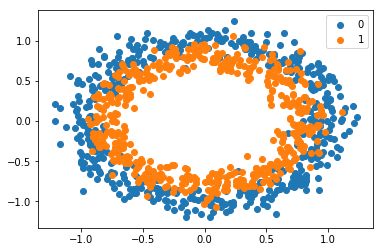

In [141]:
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
    pyplot.legend()
pyplot.show()

In [144]:
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.810, Test: 0.814


In [143]:
from keras.initializers import RandomUniform

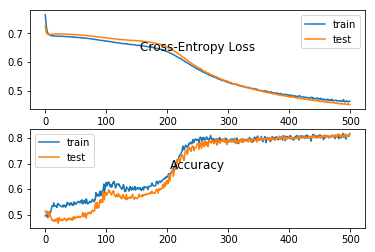

In [145]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [146]:
# Deeper MLP Model

Train: 0.512, Test: 0.480


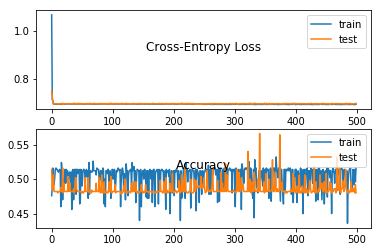

In [147]:
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.820, Test: 0.838


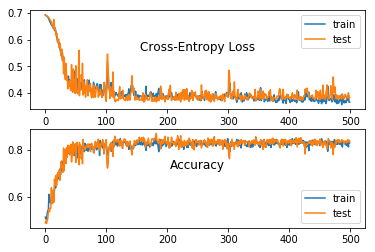

In [148]:
# deeper mlp with relu for the two circles classification problem (5 hidden layers)
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
# Fix Exploding Gradients with Gradient Clipping